# Exercise 02:
### Each topic is like a problem to be resolved
* Dataset: [Iris](https://www.kaggle.com/uciml/iris)
* The objective of this problem is to classify iris plants into three species in this classic dataset

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)

iris_df = pd.read_csv('/home/j/Personal/MachineLearning-course/data-sets/Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [353]:
iris_df.drop('Id', axis=1, inplace=True)  # Deleting Id column

In [354]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Above We can see that each column has 150 samples
##### Let's know more about each column and the data, there!

In [355]:
iris_df['SepalLengthCm'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [356]:
print('The min of this column is ', iris_df['SepalLengthCm'].min(),' and the max is ',iris_df['SepalLengthCm'].max())

The min of this column is  4.3  and the max is  7.9


In [357]:
iris_df['SepalWidthCm'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [358]:
print('The min of this column is ', iris_df['SepalWidthCm'].min(),' and the max is ',iris_df['SepalWidthCm'].max())

The min of this column is  2.0  and the max is  4.4


In [359]:
iris_df['PetalLengthCm'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [360]:
print('The min of this column is ', iris_df['PetalLengthCm'].min(),' and the max is ',iris_df['PetalLengthCm'].max())

The min of this column is  1.0  and the max is  6.9


In [361]:
iris_df['PetalWidthCm'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [362]:
print('The min of this column is ', iris_df['PetalWidthCm'].min(),' and the max is ',iris_df['PetalWidthCm'].max())

The min of this column is  0.1  and the max is  2.5


In [363]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Coments:
- The columns ```SepalLengthCm```, ```SepalWidthCm```, ```PetalLengthCm``` and ```PetalWidthCm```, just has values and their min and max are so diferent.
- The column ```Species``` just has three values and they are the type of Iris that We're analyzing

## Spliting our data to make the train dataset and test dataset

In [364]:
shuffle_df = iris_df.sample(frac=1, random_state=36) # Shuffling our data, The frac = 1 is the percent of data that we're using
train_size = int(0.8 * len(iris_df)) # Selecting the size of our train data set

train_set = shuffle_df[:train_size] # Selecting 80% of our data set
test_set = shuffle_df[train_size:] # Starting at 80% to the end of our data set

In [365]:
''' 
tests = {}
trains = {}
for g, dfg in iris_df.groupby('Species'):
    trains[g] = dfg.sample(frac = 0.7)
    tests[g] = dfg.loc[ ~dfg.index.isin(trains[g].index), ]
'''

" \ntests = {}\ntrains = {}\nfor g, dfg in iris_df.groupby('Species'):\n    trains[g] = dfg.sample(frac = 0.7)\n    tests[g] = dfg.loc[ ~dfg.index.isin(trains[g].index), ]\n"

In [366]:
train_set['Species'].value_counts()

Iris-setosa        40
Iris-virginica     40
Iris-versicolor    40
Name: Species, dtype: int64

In [367]:
test_set['Species'].value_counts()

Iris-setosa        10
Iris-virginica     10
Iris-versicolor    10
Name: Species, dtype: int64

In [368]:
train_set.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
145,6.7,3.0,5.2,2.3,Iris-virginica
86,6.7,3.1,4.7,1.5,Iris-versicolor
118,7.7,2.6,6.9,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica


In [369]:
train_set.mean(axis = 0)

SepalLengthCm    5.840833
SepalWidthCm     3.043333
PetalLengthCm    3.740833
PetalWidthCm     1.211667
dtype: float64

In [370]:
train_set['mean'] =  train_set.iloc[:,:4].mean(axis = 1) # Creating a new column that has the means

In [371]:
train_set.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,mean
50,7.0,3.2,4.7,1.4,Iris-versicolor,4.075
145,6.7,3.0,5.2,2.3,Iris-virginica,4.300
86,6.7,3.1,4.7,1.5,Iris-versicolor,4.000
118,7.7,2.6,6.9,2.3,Iris-virginica,4.875
122,7.7,2.8,6.7,2.0,Iris-virginica,4.800


## Let's select the columns where each species appears
### After this, we'll see the mean column of each species sorted to try see any pattern

In [372]:
train_set[train_set['Species'] == 'Iris-setosa'].sort_values(by = 'mean').head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,mean
41,4.5,2.3,1.3,0.3,Iris-setosa,2.100
13,4.3,3.0,1.1,0.1,Iris-setosa,2.125
8,4.4,2.9,1.4,0.2,Iris-setosa,2.225
38,4.4,3.0,1.3,0.2,Iris-setosa,2.225
42,4.4,3.2,1.3,0.2,Iris-setosa,2.275


In [373]:
train_set[train_set['Species'] == 'Iris-versicolor'].sort_values(by = 'mean').head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,mean
60,5.0,2.0,3.5,1.0,Iris-versicolor,2.875
93,5.0,2.3,3.3,1.0,Iris-versicolor,2.900
57,4.9,2.4,3.3,1.0,Iris-versicolor,2.900
81,5.5,2.4,3.7,1.0,Iris-versicolor,3.150
80,5.5,2.4,3.8,1.1,Iris-versicolor,3.200


In [374]:
train_set[train_set['Species'] == 'Iris-virginica'].sort_values(by = 'mean').head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,mean
106,4.9,2.5,4.5,1.7,Iris-virginica,3.400
119,6.0,2.2,5.0,1.5,Iris-virginica,3.675
113,5.7,2.5,5.0,2.0,Iris-virginica,3.800
101,5.8,2.7,5.1,1.9,Iris-virginica,3.875
142,5.8,2.7,5.1,1.9,Iris-virginica,3.875


#### After do this we can see each class of iris has a min and max. The problem is that there are intersections between the means and we have to try another way to evaluate. 

- Let's try to do the mean of sepal and the pedal...

In [375]:
train_set['sepal_mean'] = train_set.iloc[:,:2].mean(axis = 1)
train_set['petal_mean'] = train_set.iloc[:,2:4].mean(axis = 1)

In [376]:
train_set.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,mean,sepal_mean,petal_mean
50,7.0,3.2,4.7,1.4,Iris-versicolor,4.075,5.10,3.05
145,6.7,3.0,5.2,2.3,Iris-virginica,4.300,4.85,3.75
86,6.7,3.1,4.7,1.5,Iris-versicolor,4.000,4.90,3.10
118,7.7,2.6,6.9,2.3,Iris-virginica,4.875,5.15,4.60
122,7.7,2.8,6.7,2.0,Iris-virginica,4.800,5.25,4.35


In [377]:
train_set[train_set['Species'] == 'Iris-setosa'].sort_values(by = ['sepal_mean','petal_mean']).head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,mean,sepal_mean,petal_mean
41,4.5,2.3,1.3,0.3,Iris-setosa,2.100,3.40,0.80
13,4.3,3.0,1.1,0.1,Iris-setosa,2.125,3.65,0.60
8,4.4,2.9,1.4,0.2,Iris-setosa,2.225,3.65,0.80
38,4.4,3.0,1.3,0.2,Iris-setosa,2.225,3.70,0.75
42,4.4,3.2,1.3,0.2,Iris-setosa,2.275,3.80,0.75


In [378]:
train_set[train_set['Species'] == 'Iris-versicolor'].sort_values(by = ['sepal_mean','petal_mean']).head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,mean,sepal_mean,petal_mean
60,5.0,2.0,3.5,1.0,Iris-versicolor,2.875,3.50,2.25
93,5.0,2.3,3.3,1.0,Iris-versicolor,2.900,3.65,2.15
57,4.9,2.4,3.3,1.0,Iris-versicolor,2.900,3.65,2.15
53,5.5,2.3,4.0,1.3,Iris-versicolor,3.275,3.90,2.65
81,5.5,2.4,3.7,1.0,Iris-versicolor,3.150,3.95,2.35


In [379]:
train_set[train_set['Species'] == 'Iris-virginica'].sort_values(by = ['sepal_mean','petal_mean']).head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,mean,sepal_mean,petal_mean
106,4.9,2.5,4.5,1.7,Iris-virginica,3.400,3.70,3.10
119,6.0,2.2,5.0,1.5,Iris-virginica,3.675,4.10,3.25
113,5.7,2.5,5.0,2.0,Iris-virginica,3.800,4.10,3.50
142,5.8,2.7,5.1,1.9,Iris-virginica,3.875,4.25,3.50
101,5.8,2.7,5.1,1.9,Iris-virginica,3.875,4.25,3.50


### Above we can see that there is a pattern and it's the petal mean. Let's use this information to do our algorithm!

In [380]:
setosa = train_set[train_set['Species'] == 'Iris-setosa'].sort_values(by = ['petal_mean'])
print('The setosa shape is {}'.format(train_set[train_set['Species'] == 'Iris-setosa'].sort_values(by = ['petal_mean']).shape))

The setosa shape is (40, 8)


In [381]:
versicolor = train_set[train_set['Species'] == 'Iris-versicolor'].sort_values(by = ['petal_mean'])
print('The versicolor shape is {}'.format(train_set[train_set['Species'] == 'Iris-versicolor'].sort_values(by = ['petal_mean']).shape))

The versicolor shape is (40, 8)


In [382]:
virginica = train_set[train_set['Species'] == 'Iris-virginica'].sort_values(by = ['petal_mean'])
print('The virginica shape is {}'.format(train_set[train_set['Species'] == 'Iris-virginica'].sort_values(by = ['petal_mean']).shape))

The virginica shape is (40, 8)


#### Creating new id columns to help the plot.

The min of setosa is:  0.6
The max of setosa is:  1.1


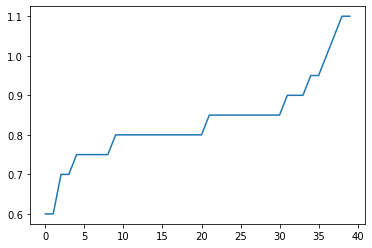

In [383]:
setosa['id'] = np.arange(0,40)
setosa.iloc[:,7:]

print('The min of setosa is: ',setosa['petal_mean'].min())
print('The max of setosa is: ',setosa['petal_mean'].max())
plt.plot(setosa['id'], setosa['petal_mean']);

The min of versicolor is:  2.15
The max of versicolor is:  3.35


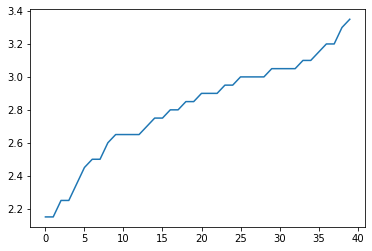

In [384]:
versicolor['id'] = np.arange(0,40)
versicolor.iloc[:,7:]

print('The min of versicolor is: ',versicolor['petal_mean'].min())
print('The max of versicolor is: ',versicolor['petal_mean'].max())
plt.plot(versicolor['id'], versicolor['petal_mean']);

The min of virginica is:  3.1
The max of virginica is:  4.6


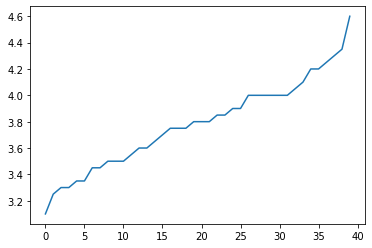

In [385]:
virginica['id'] = np.arange(0,40)
virginica.iloc[:,7:]

print('The min of virginica is: ',virginica['petal_mean'].min())
print('The max of virginica is: ',virginica['petal_mean'].max())
plt.plot(virginica['id'], virginica['petal_mean']);

In [386]:
setosa['petal_mean'].min(), setosa['petal_mean'].max()

(0.6, 1.1)

In [387]:
versicolor['petal_mean'].min(), versicolor['petal_mean'].max()

(2.15, 3.35)

In [388]:
virginica['petal_mean'].min(), virginica['petal_mean'].max() 

(3.1, 4.6)

### We can understand that there are three intervals and each of one has a min and max specific...

In [389]:
print('If petal_mean is to y then we have an setosa')
setosa['petal_mean'].max() + abs((setosa['petal_mean'].max() - versicolor['petal_mean'].min()) / 2)

If petal_mean is to y then we have an setosa


1.625

In [390]:
setosa['petal_mean'].max() + abs((setosa['petal_mean'].max() - versicolor['petal_mean'].min()) / 2), virginica['petal_mean'].min() + abs(versicolor['petal_mean'].max() -  virginica['petal_mean'].min() )

(1.625, 3.35)

In [391]:
virginica['petal_mean'].min() + abs(versicolor['petal_mean'].max() -  virginica['petal_mean'].min())

3.35

### Making our algorithm that predicts the specie of iris

In [395]:
def petal_mean(dataframe):
    my_df = dataframe.copy()
    my_df['petal_mean'] = my_df.iloc[:,2:4].mean(axis=1)
    my_df['answer'] = pd.Series(dtype=str)
    
    my_df['answer'].loc[my_df['petal_mean'].between(0., 1.625)] = 'Iris-setosa'
    my_df['answer'].loc[my_df['petal_mean'].between(1.625,  3.35)] = 'Iris-versicolor'
    my_df['answer'].loc[my_df['petal_mean'].between( 3.35, 5)] = 'Iris-virginica'
    
    return my_df

In [396]:
answer = petal_mean(test_set)
answer

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,petal_mean,answer
18,5.7,3.8,1.7,0.3,Iris-setosa,1.00,Iris-setosa
82,5.8,2.7,3.9,1.2,Iris-versicolor,2.55,Iris-versicolor
88,5.6,3.0,4.1,1.3,Iris-versicolor,2.70,Iris-versicolor
19,5.1,3.8,1.5,0.3,Iris-setosa,0.90,Iris-setosa
103,6.3,2.9,5.6,1.8,Iris-virginica,3.70,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor,3.00,Iris-versicolor
74,6.4,2.9,4.3,1.3,Iris-versicolor,2.80,Iris-versicolor
143,6.8,3.2,5.9,2.3,Iris-virginica,4.10,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica,3.70,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica,4.45,Iris-virginica


In [397]:
answer.shape

(30, 7)

In [398]:
acurracy = (answer['Species'] == answer['answer']).value_counts().tolist()
acurracy = acurracy[0] / (acurracy[0] + acurracy[1])
acurracy

0.9666666666666667

In [405]:
print(f'The acurracy of our model is {round(acurracy*100, 2)}%')

The acurracy of our model is 96.67%
